In [255]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [256]:
%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
from pylab import *
import os
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4)})
plotStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
np.seterr(divide='ignore',invalid='ignore')
pass

### Setup the notebook.

In [257]:
import h5py
import math
testNames=[
           "first_order_birth_death_time_limit",
           "first_order_birth_death_lower_species_limit",
           "first_order_birth_death_upper_species_limit",
           "first_order_birth_death_fpt_tracking",
           "first_order_birth_death_barrier_sp",
           "first_order_birth_death_barrier_op",
           "first_order_birth_death_tracking_barrier_sp",
           "first_order_birth_death_tracking_barrier_op",
           "first_order_birth_death_tracking_barrier_limit_sp",
           "first_order_birth_death_tracking_barrier_limit_op",
           "first_order_birth_death_time_limit_nrm",
           "first_order_birth_death_lower_species_limit_nrm",
           "first_order_birth_death_upper_species_limit_nrm",
           "first_order_birth_death_fpt_tracking_nrm",
           "first_order_birth_death_barrier_sp_nrm",
           "first_order_birth_death_barrier_op_nrm",
           "first_order_birth_death_tracking_barrier_sp_nrm",
           "first_order_birth_death_tracking_barrier_op_nrm",
           "first_order_birth_death_tracking_barrier_limit_sp_nrm",
           "first_order_birth_death_tracking_barrier_limit_op_nrm",
#            "first_order_birth_death_time_limit_avx",
#            "first_order_birth_death_lower_species_limit_avx",
#            "first_order_birth_death_upper_species_limit_avx",
#            "first_order_birth_death_fpt_tracking_avx",
          ]
test_names_bash_list=" ".join(testNames)
def isclose(a, b, rel_tol=1e-09, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

In [258]:
%%bash
rm -rf tmp && mkdir tmp

### Execute the simulations.

In [259]:
%%bash -s "$test_names_bash_list"
sbmlFilename="first_order_birth_death.sbml"
for testName in $1; do
    outputFilename=tmp/${testName}.lm
    rm -f ${outputFilename}* && lm_sbml_import ${outputFilename} ${sbmlFilename} > ${outputFilename}.import.log
    if [[ ${testName} == first_order_birth_death_time_limit* ]]; then
        lm_setp ${outputFilename} writeInterval=1e-2 maxTime=1e1 > /dev/null
    elif [[ ${testName} == first_order_birth_death_no_limit* ]]; then
        lm_setp ${outputFilename} writeInterval=1e-2 > /dev/null
    elif [[ ${testName} == first_order_birth_death_lower_species_limit* ]]; then
        lm_setp ${outputFilename} writeInterval=1e-2 maxTime=1e2 "speciesLowerLimitList=0:900" > /dev/null
    elif [[ ${testName} == first_order_birth_death_upper_species_limit* ]]; then
        lm_setp ${outputFilename} writeInterval=1e-2 maxTime=1e2 "speciesUpperLimitList=0:2002" > /dev/null
    elif [[ ${testName} == first_order_birth_death_fpt_tracking* ]]; then
        lm_setp ${outputFilename} writeInterval=1e-2 maxTime=1e2 fptTrackingList=0 > /dev/null
    elif [[ ${testName} == first_order_birth_death_barrier_sp* ]]; then
        lm_setrm ${outputFilename} "InitialSpeciesCounts=[1000]" > /dev/null
        lm_setp ${outputFilename} writeInterval=1e-1 maxTime=1e2 "speciesReflectingBarrierList=0:970,0:1030" > /dev/null
    elif [[ ${testName} == first_order_birth_death_barrier_op* ]]; then
        lm_setrm ${outputFilename} "InitialSpeciesCounts=[1000]" "OrderParameterCoefficients(0)=[0.001]" > /dev/null
        lm_setp ${outputFilename} writeInterval=1e-1 maxTime=1e2 orderParameterWriteInterval=1e-1 "orderParameterReflectingBarrierList=0:0.97,0:1.03" > /dev/null
    elif [[ ${testName} == first_order_birth_death_tracking_barrier_sp* ]]; then
        lm_setrm ${outputFilename} "InitialSpeciesCounts=[1000]" > /dev/null
        lm_setp ${outputFilename} writeInterval=1e-1 maxTime=1e2 "speciesTrackingBarrierList=0:930,0:1070" > /dev/null
    elif [[ ${testName} == first_order_birth_death_tracking_barrier_op* ]]; then
        lm_setrm ${outputFilename} "InitialSpeciesCounts=[1000]" "OrderParameterCoefficients(0)=[0.001]" > /dev/null
        lm_setp ${outputFilename} writeInterval=1e-1 maxTime=1e2 orderParameterWriteInterval=1e-1 "orderParameterTrackingBarrierList=0:0.93,0:1.07" > /dev/null
    elif [[ ${testName} == first_order_birth_death_tracking_barrier_limit_sp* ]]; then
        lm_setrm ${outputFilename} "InitialSpeciesCounts=[1000]" > /dev/null
        lm_setp ${outputFilename} writeInterval=1e-1 maxTime=1e2 "speciesReflectingBarrierList=0:900,0:1100" "speciesTrackingBarrierList=0:930,0:1070" "trackingBarrierLimitList=0:100,1:50" > /dev/null
    elif [[ ${testName} == first_order_birth_death_tracking_barrier_limit_op* ]]; then
        lm_setrm ${outputFilename} "InitialSpeciesCounts=[1000]" "OrderParameterCoefficients(0)=[0.001]" > /dev/null
        lm_setp ${outputFilename} writeInterval=1e-1 maxTime=1e2 orderParameterWriteInterval=1e-1 "orderParameterReflectingBarrierList=0:0.9,0:1.11" "orderParameterTrackingBarrierList=0:0.93,0:1.07" "trackingBarrierLimitList=0:100,1:50"> /dev/null
    else
        echo "Invalid test name: ${testName}"
        continue
    fi
    if [[ ${testName} == *_nrm ]]; then
        lmes -r 1-1000 -f ${outputFilename} -sl lm::cme::NextReactionSolver > ${outputFilename}.simulate.log
    elif [[ ${testName} == *_avx ]]; then
        lmes -r 1-1000 -f ${outputFilename} -sl lm::avx::GillespieDSolverAVX > ${outputFilename}.simulate.log
    else
        lmes -r 1-1000 -f ${outputFilename} -sl lm::cme::GillespieDSolver > ${outputFilename}.simulate.log
    fi
done;
echo "Finished."

Finished.


### Spot check some simulations.

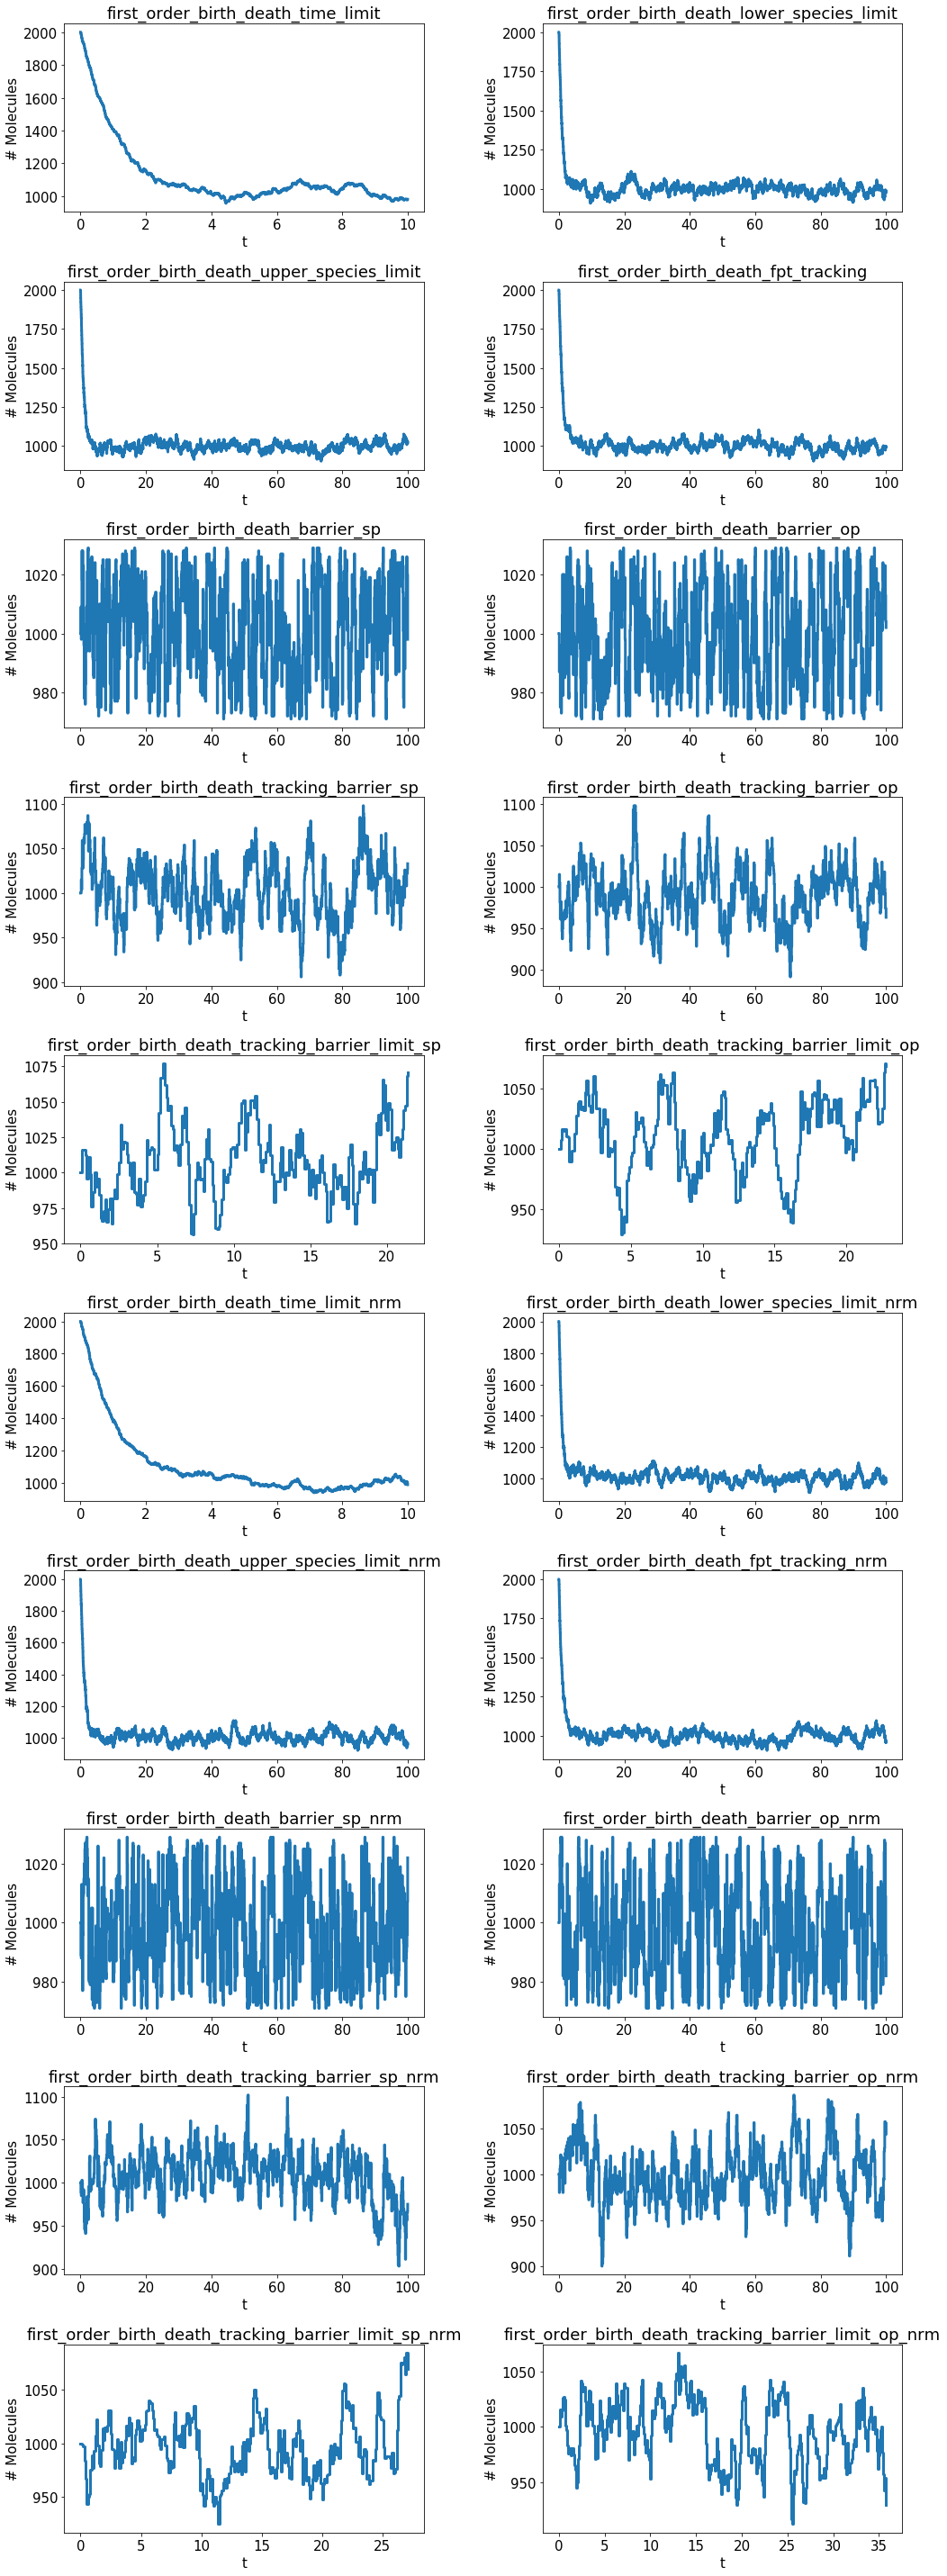

In [260]:
# Plot the time series for a single replicate.
for i,testName in enumerate(testNames):
    testOutputFilename="tmp/%s.lm"%(testName)
    fp = h5py.File(testOutputFilename, "r")
    cols=2
    rows=len(testNames)//cols
    if rows*cols < len(testNames): rows += 1
    matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,4*rows)})
    for replicate in (1,):
        counts=np.array(fp["/Simulations/%07d/SpeciesCounts"%replicate], dtype=double)
        times=np.array(fp["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double)
        plt.subplot(rows,cols,i+1)
        step(times,counts[:,0], **stepStyles)
        xlabel('t'); ylabel('# Molecules'); title("%s"%(testName))
    fp.close()
plt.tight_layout()
pass

### Define the tests.

In [261]:
def test_first_order_birth_death_time_limit(testOutputFilename):
    fp = h5py.File(testOutputFilename, "r")
    replicates=fp["/Simulations"].keys()
    k=0
    mSim=None
    vSim=None
    times=None
    for replicate in replicates:
        if times is None:
            times = np.array(fp["/Simulations/%s/SpeciesCountTimes"%replicate], dtype=double)
        counts = np.array(fp["/Simulations/%s/SpeciesCounts"%replicate], dtype=double)
        if mSim is None:
            k += 1
            mSim = counts
            vSim = np.zeros(counts.shape, dtype=double)
        else:
            k += 1
            mSim = mSim + (counts-mSim)/k
            vSim = vSim + (counts-mSim)*(counts-mSim)
    vSim /= float((k-1))

    # Plot the accuracy of the mean and variance.
    matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,3)})
    ax=plt.subplot(1,2,1)
    plt.plot(times,mSim, **plotStyles)
    ax.set_yscale('log'); xlabel('t'); ylabel('E{X(t)}'); title("%s"%(testOutputFilename))
    ax=plt.subplot(1,2,2)
    plt.plot(times,vSim, **plotStyles)
    ax.set_yscale('log'); xlabel('t'); ylabel('Var{X(t)}'); title("%s"%(testOutputFilename))
    fp.close()

    value = np.mean(mSim[len(mSim)//2:])
    if not isclose(value,1000.0,1e-2): raise Exception("incorrect value for mean",value)
    value = np.mean(vSim[len(mSim)//2:])
    if not isclose(value,1020.0,1e-1): raise Exception("incorrect value for variance",value)

In [262]:
def test_first_order_birth_death_lower_species_limit(testOutputFilename):
    fp = h5py.File(testOutputFilename, "r")
    replicates=fp["/Simulations"].keys()
    finalTimes=[]
    finalCounts=[]
    for replicate in replicates:
        counts = fp["/Simulations/%s/SpeciesCounts"%replicate]
        times = fp["/Simulations/%s/SpeciesCountTimes"%replicate]
        finalTimes.append(times[-1])
        finalCounts.append(counts[-1])
            
    # Plot the final times.
    matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,3)})
    subplot(1,2,1)
    hist(finalTimes,100)
    xlabel('Final Time'); ylabel('# Runs'); title("%s"%(testOutputFilename))
    fp.close()
    
    value = np.min(finalCounts)
    if value != 900: raise Exception("incorrect value for final count",value)

In [263]:
def test_first_order_birth_death_upper_species_limit(testOutputFilename):
    fp = h5py.File(testOutputFilename, "r")
    replicates=fp["/Simulations"].keys()
    finalTimes=[]
    finalCounts=[]
    for replicate in replicates:
        counts = fp["/Simulations/%s/SpeciesCounts"%replicate]
        times = fp["/Simulations/%s/SpeciesCountTimes"%replicate]
        finalTimes.append(times[-1])
        finalCounts.append(counts[-1])
            
    # Plot the final times.
    matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,3)})
    subplot(1,2,1)
    hist(finalTimes,100)
    xlabel('Final Time'); ylabel('# Runs'); title("%s"%(testOutputFilename))
    fp.close()
    
    value = np.max(finalCounts)
    if value != 2002: raise Exception("incorrect value for final count",value)

In [264]:
def test_first_order_birth_death_fpt_tracking(testOutputFilename):
    fp = h5py.File(testOutputFilename, "r")
    replicates=fp["/Simulations"].keys()    
    allCounts = np.zeros((2100,), dtype=double)
    allTimes = np.zeros((2100,), dtype=double)
    for replicate in replicates:
        counts=np.array(fp["/Simulations/%s/FirstPassageTimes/00/Counts"%replicate], dtype=double)
        times=np.array(fp["/Simulations/%s/FirstPassageTimes/00/Times"%replicate], dtype=double)
        start = int(counts[0])
        end = start+counts.shape[0]
        allCounts[start:end] += 1    
        allTimes[start:end] += times
    allTimes /= allCounts

    # Plot the mean first passage times.
    matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,3)})
    subplot(1,2,1)
    plot(np.arange(0,len(allCounts), dtype=double),allTimes, **plotStyles)
    yscale('log'); xlabel('X'); ylabel('E{FPT(X)}'); title("%s"%(testOutputFilename))
    
    value = allTimes[1000]    
    if not isclose(value,4.1,1e-1): raise Exception("incorrect value for mfpt[0]",value)

In [265]:
def test_first_order_birth_death_barrier(testOutputFilename):
    fp = h5py.File(testOutputFilename, "r")
    replicates=fp["/Simulations"].keys()
    k=0
    mSim=None
    vSim=None
    times=None
    mins=np.zeros(len(replicates))
    maxs=np.zeros(len(replicates))
    for i,replicate in enumerate(replicates):
        if times is None:
            times = np.array(fp["/Simulations/%s/SpeciesCountTimes"%replicate], dtype=double)
        counts = np.array(fp["/Simulations/%s/SpeciesCounts"%replicate], dtype=double)
        mins[i] = np.min(counts)
        maxs[i] = np.max(counts)
        if mSim is None:
            k += 1
            mSim = counts
            vSim = np.zeros(counts.shape, dtype=double)
        else:
            k += 1
            mSim = mSim + (counts-mSim)/k
            vSim = vSim + (counts-mSim)*(counts-mSim)
    vSim /= float((k-1))

    # Plot the accuracy of the mean and variance.
    matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,6)})
    ax=plt.subplot(2,2,1)
    plt.plot(times,mSim, **plotStyles)
    xlabel('t'); ylabel('E{X(t)}'); title("%s"%(testOutputFilename))
    ax=plt.subplot(2,2,2)
    plt.plot(times[10:],vSim[10:], **plotStyles)
    xlabel('t'); ylabel('Var{X(t)}'); title("%s"%(testOutputFilename))
    fp.close()
    subplot(2,2,3)
    hist(mins,20)
    xlabel('Min Count'); ylabel('# Runs')
    subplot(2,2,4)
    hist(maxs,20)
    xlabel('Max Count'); ylabel('# Runs')
    
    value = np.min(mins)
    if not isclose(value,971.0,1e-5): raise Exception("incorrect value for min",value)
    value = np.max(maxs)
    if not isclose(value,1029.0,1e-5): raise Exception("incorrect value for max",value)
    

In [266]:
def test_first_order_birth_death_tracking_barrier(testOutputFilename):
    fp = h5py.File(testOutputFilename, "r")
    replicates=fp["/Simulations"].keys()
    times0=[]
    times1=[]
    for replicate in replicates[0:100]:
        t1 = fp["/Simulations/%s/BarrierCrossingTimes/0/Times"%replicate]
        c1 = fp["/Simulations/%s/BarrierCrossingTimes/0/SpeciesCounts"%replicate]
        if c1.shape[0] > 0:
            if np.min(c1) < 930 or np.max(c1) > 930: raise Exception("incorrect value for c1 count",np.min(c1),np.max(c1))
            for i in range(1,t1.shape[0]):
                times0.append(t1[i]-t1[i-1])
        t2 = fp["/Simulations/%s/BarrierCrossingTimes/1/Times"%replicate]
        c2 = fp["/Simulations/%s/BarrierCrossingTimes/1/SpeciesCounts"%replicate]
        if c2.shape[0] > 0:
            if np.min(c2) < 1070 or np.max(c2) > 1070: raise Exception("incorrect value for c1 count",np.min(c2),np.max(c2))
            for i in range(1,t2.shape[0]):
                times1.append(t2[i]-t2[i-1])
            
    # Plot a trace.
    matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,6)})
    counts = fp["/Simulations/%s/SpeciesCounts"%replicates[0]]
    times = fp["/Simulations/%s/SpeciesCountTimes"%replicates[0]]
    t1 = fp["/Simulations/%s/BarrierCrossingTimes/0/Times"%replicates[0]]
    t2 = fp["/Simulations/%s/BarrierCrossingTimes/1/Times"%replicates[0]]
    subplot(2,2,1)
    plot(times, counts[:,0])
    for t in t1: axvline(t, color='r', linestyle='-', linewidth=0.25)
    xlabel('t'); ylabel('X(t)'); title("%s"%(testOutputFilename))
    subplot(2,2,2)
    plot(times, counts[:,0])
    for t in t2: axvline(t, color='r', linestyle='-', linewidth=0.25)
    xlabel('t'); ylabel('X(t)'); title("%s"%(testOutputFilename))
    subplot(2,2,3)
    hist(times0, 100)
    xlabel('$\Delta t$'); ylabel('Count')
    subplot(2,2,4)
    hist(times1, 100)
    xlabel('$\Delta t$'); ylabel('Count')
    
    fp.close()
    
    value = len(times0)
    if value < 15000 or value > 30000: raise Exception("incorrect value for number of times 0",value)
    value = len(times1)
    if value < 15000 or value > 30000: raise Exception("incorrect value for number of times 1",value)        

In [282]:
def test_first_order_birth_death_tracking_barrier_limit(testOutputFilename):
    fp = h5py.File(testOutputFilename, "r")
    replicates=fp["/Simulations"].keys()
    barrierLimitsReached=0
    barrierLimitsSampled=0
    for replicate in replicates:
        times = fp["/Simulations/%s/SpeciesCountTimes"%replicate]
        c1 = fp["/Simulations/%s/BarrierCrossingTimes/0/SpeciesCounts"%replicate]
        if c1.shape[0] > 0:
            if np.min(c1) < 930 or np.max(c1) > 930: raise Exception("incorrect value for c1 count",np.min(c1),np.max(c1))
        c2 = fp["/Simulations/%s/BarrierCrossingTimes/1/SpeciesCounts"%replicate]
        if c2.shape[0] > 0:
            if np.min(c2) < 1070 or np.max(c2) > 1070: raise Exception("incorrect value for c1 count",np.min(c2),np.max(c2))
        if c1.shape[0] != 100 and c2.shape[0] != 50 and not isclose(times[-1],100.0,0.01): raise Exception("incorrect number of barrier crossings",t1.shape[0],t2.shape[0],times[-1],replicate)
        if c1.shape[0] == 100 or c2.shape[0] == 50: barrierLimitsReached += 1
        barrierLimitsSampled += 1
            
    if barrierLimitsReached < 0.95*barrierLimitsSampled: raise Exception("incorrect number of barrier limits reached",barrierLimitsReached,barrierLimitsSampled)
            
    # Plot a trace.
    matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (15,3)})
    counts = fp["/Simulations/%s/SpeciesCounts"%replicates[0]]
    times = fp["/Simulations/%s/SpeciesCountTimes"%replicates[0]]
    t1 = fp["/Simulations/%s/BarrierCrossingTimes/0/Times"%replicates[0]]
    t2 = fp["/Simulations/%s/BarrierCrossingTimes/1/Times"%replicates[0]]
    subplot(1,2,1)
    plot(times, counts[:,0])
    for t in t1: axvline(t, color='r', linestyle='-', linewidth=0.25)
    xlabel('t'); ylabel('X(t)'); title("%s"%(testOutputFilename))
    subplot(1,2,2)
    plot(times, counts[:,0])
    for t in t2: axvline(t, color='r', linestyle='-', linewidth=0.25)
    xlabel('t'); ylabel('X(t)'); title("%s"%(testOutputFilename))
    
    fp.close()     

### Run the tests.

[first_order_birth_death_time_limit]                         : passed.


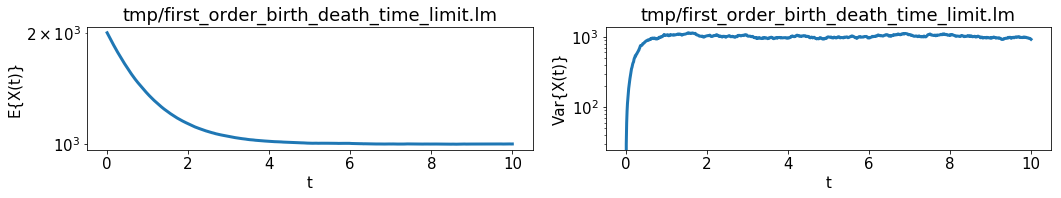

[first_order_birth_death_lower_species_limit]                : passed.


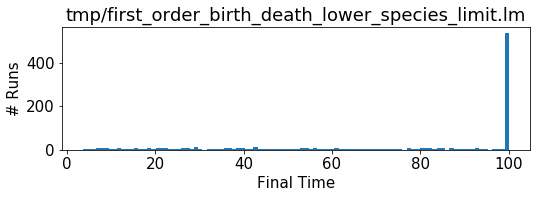

[first_order_birth_death_upper_species_limit]                : passed.


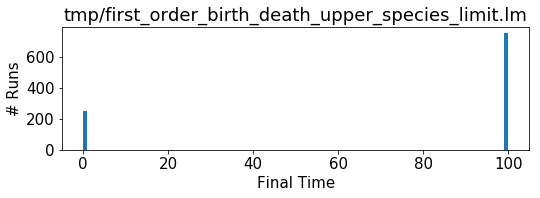

[first_order_birth_death_fpt_tracking]                       : passed.


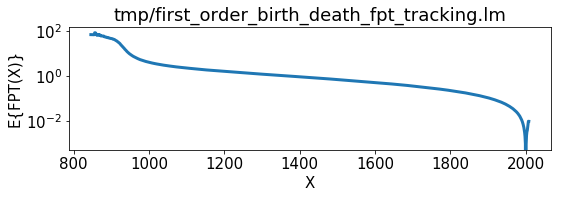

[first_order_birth_death_barrier_sp]                         : passed.


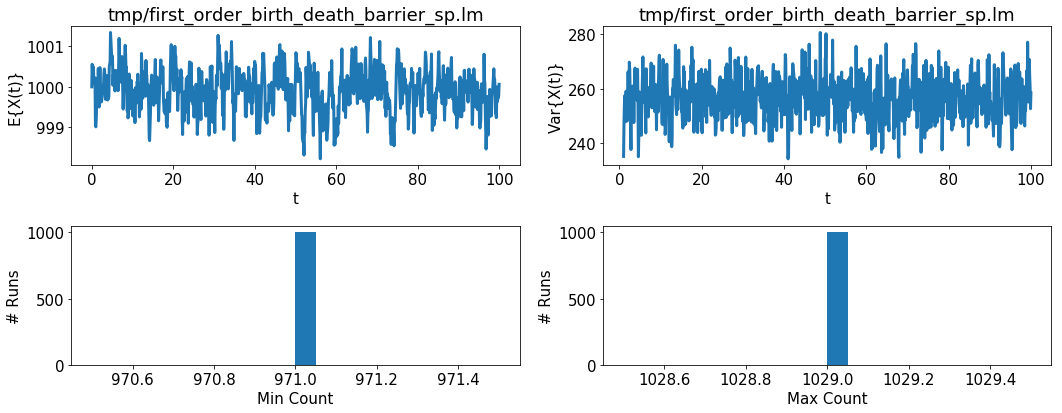

[first_order_birth_death_barrier_op]                         : passed.


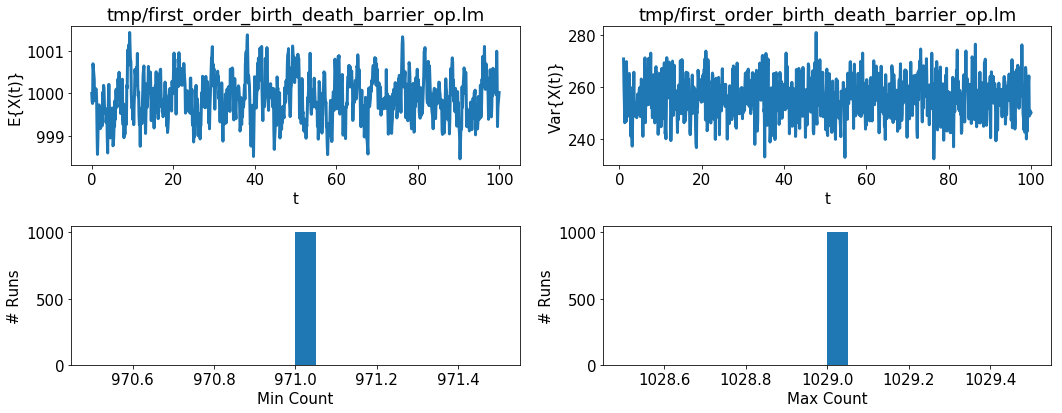

[first_order_birth_death_tracking_barrier_sp]                : passed.


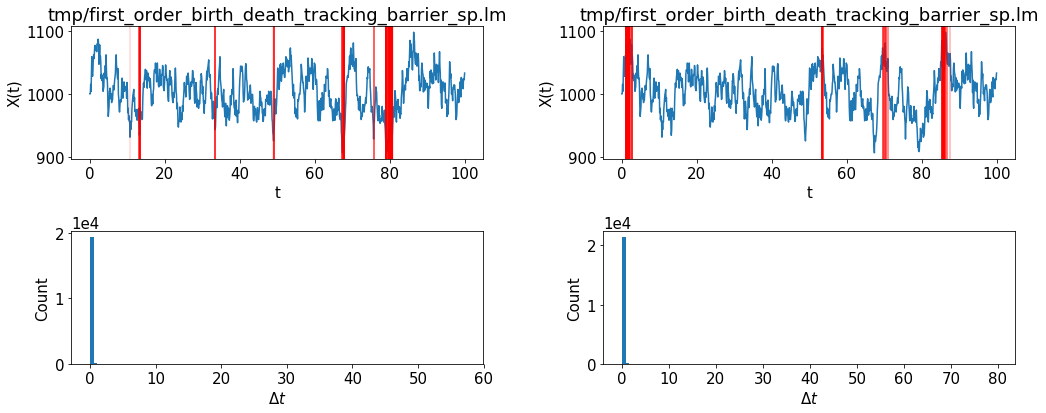

[first_order_birth_death_tracking_barrier_op]                : passed.


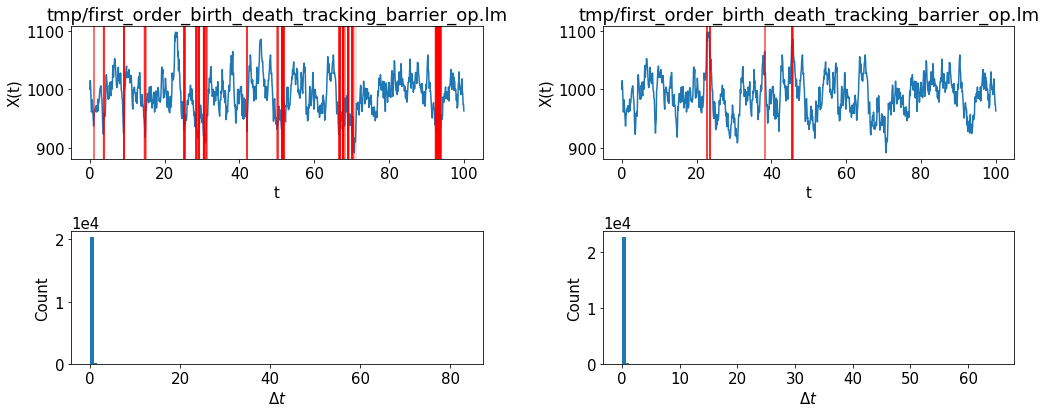

[first_order_birth_death_tracking_barrier_limit_sp]          : passed.


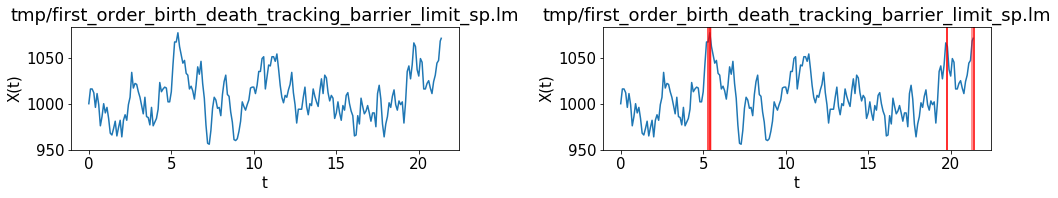

[first_order_birth_death_tracking_barrier_limit_op]          : passed.


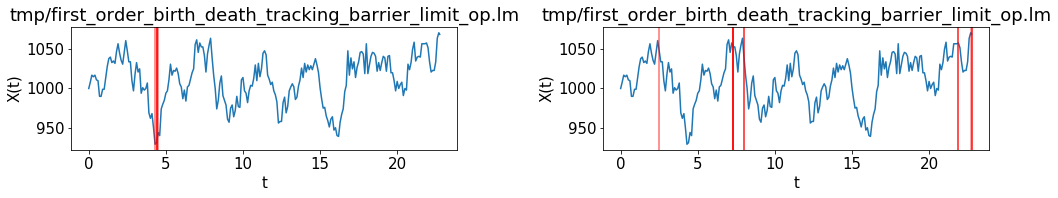

[first_order_birth_death_time_limit_nrm]                     : passed.


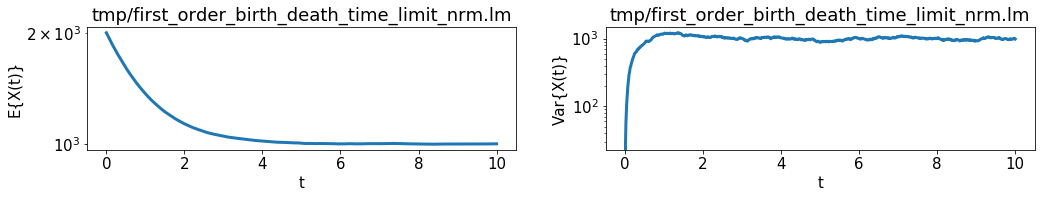

[first_order_birth_death_lower_species_limit_nrm]            : passed.


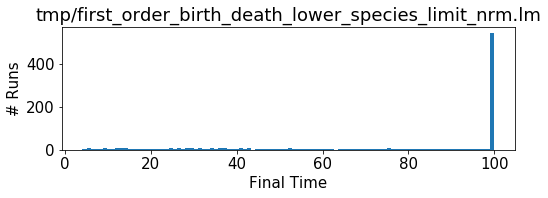

[first_order_birth_death_upper_species_limit_nrm]            : passed.


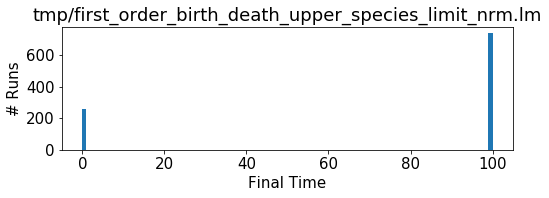

[first_order_birth_death_fpt_tracking_nrm]                   : passed.


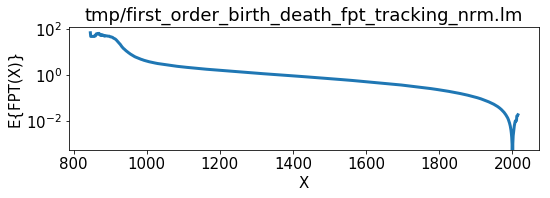

[first_order_birth_death_barrier_sp_nrm]                     : passed.


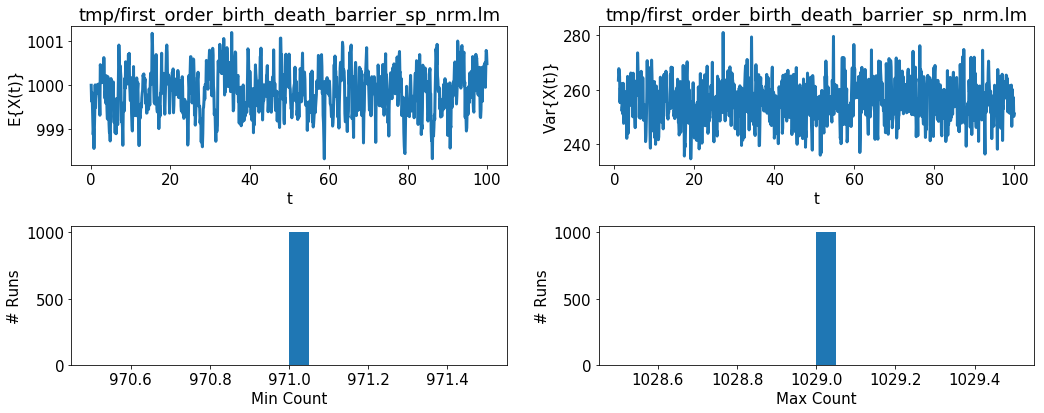

[first_order_birth_death_barrier_op_nrm]                     : passed.


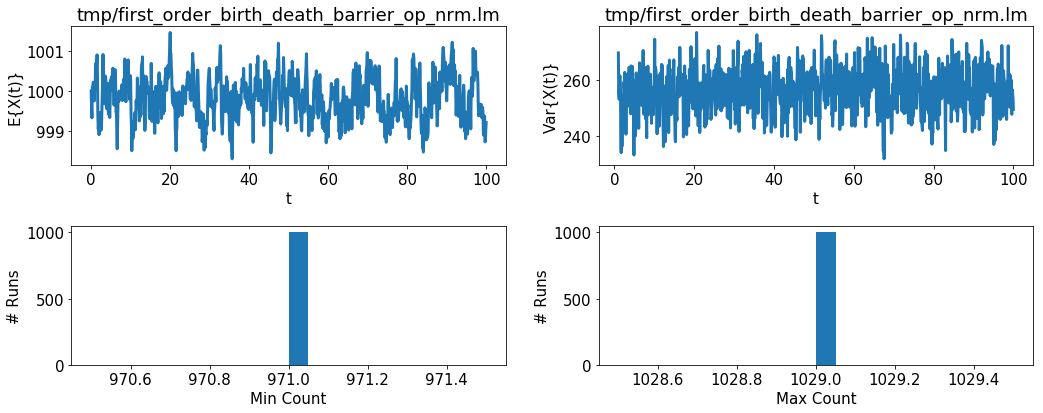

[first_order_birth_death_tracking_barrier_sp_nrm]            : passed.


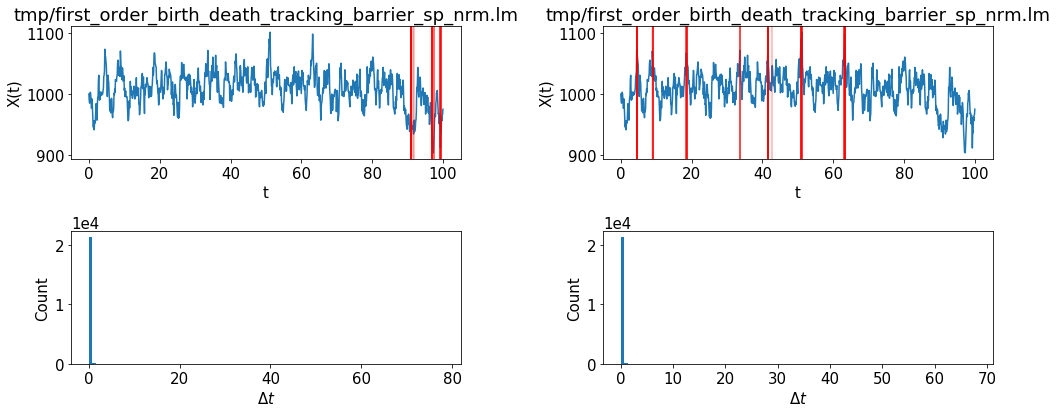

[first_order_birth_death_tracking_barrier_op_nrm]            : passed.


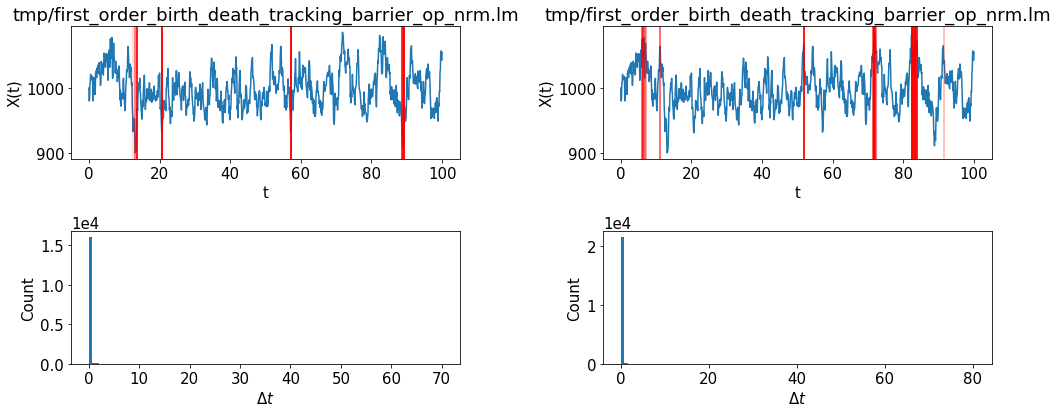

[first_order_birth_death_tracking_barrier_limit_sp_nrm]      : passed.


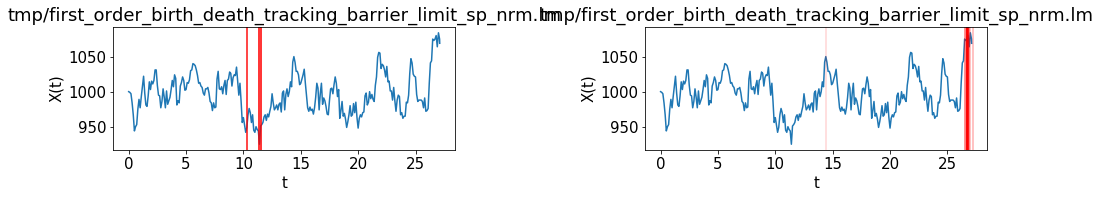

[first_order_birth_death_tracking_barrier_limit_op_nrm]      : passed.


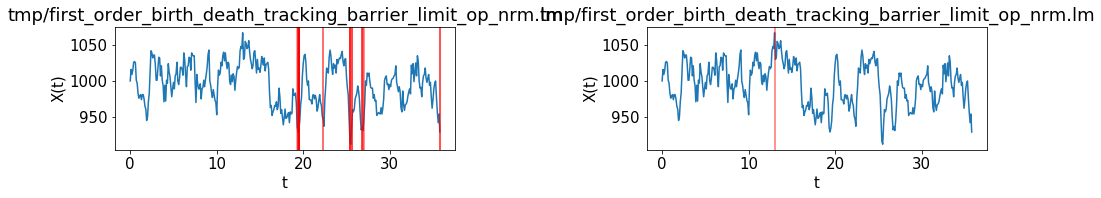

In [283]:
testMethods = {
               "first_order_birth_death_time_limit": test_first_order_birth_death_time_limit,
               "first_order_birth_death_lower_species_limit": test_first_order_birth_death_lower_species_limit,
               "first_order_birth_death_upper_species_limit": test_first_order_birth_death_upper_species_limit,
               "first_order_birth_death_fpt_tracking": test_first_order_birth_death_fpt_tracking,
               "first_order_birth_death_barrier_sp": test_first_order_birth_death_barrier,
               "first_order_birth_death_barrier_op": test_first_order_birth_death_barrier,
               "first_order_birth_death_tracking_barrier_op": test_first_order_birth_death_tracking_barrier,
               "first_order_birth_death_tracking_barrier_sp": test_first_order_birth_death_tracking_barrier,
               "first_order_birth_death_tracking_barrier_limit_op": test_first_order_birth_death_tracking_barrier_limit,
               "first_order_birth_death_tracking_barrier_limit_sp": test_first_order_birth_death_tracking_barrier_limit,
               "first_order_birth_death_time_limit_nrm": test_first_order_birth_death_time_limit,
               "first_order_birth_death_lower_species_limit_nrm": test_first_order_birth_death_lower_species_limit,
               "first_order_birth_death_upper_species_limit_nrm": test_first_order_birth_death_upper_species_limit,
               "first_order_birth_death_fpt_tracking_nrm": test_first_order_birth_death_fpt_tracking,
               "first_order_birth_death_barrier_sp_nrm": test_first_order_birth_death_barrier,
               "first_order_birth_death_barrier_op_nrm": test_first_order_birth_death_barrier,
               "first_order_birth_death_tracking_barrier_op_nrm": test_first_order_birth_death_tracking_barrier,
               "first_order_birth_death_tracking_barrier_sp_nrm": test_first_order_birth_death_tracking_barrier,
               "first_order_birth_death_tracking_barrier_limit_op_nrm": test_first_order_birth_death_tracking_barrier_limit,
               "first_order_birth_death_tracking_barrier_limit_sp_nrm": test_first_order_birth_death_tracking_barrier_limit,
               "first_order_birth_death_time_limit_avx": test_first_order_birth_death_time_limit,
               "first_order_birth_death_lower_species_limit_avx": test_first_order_birth_death_lower_species_limit,
               "first_order_birth_death_upper_species_limit_avx": test_first_order_birth_death_upper_species_limit,
               "first_order_birth_death_fpt_tracking_avx": test_first_order_birth_death_fpt_tracking,
              }
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (20,5*len(testNames))})
i=1
for testName in testNames:
    try:
        testOutputFilename="tmp/%s.lm"%(testName)
        testMethods[testName](testOutputFilename)
    except Exception as e:
        print "%-60s : FAILED with:"%("["+testName+"]"),e
    except:
        print "%-60s : FAILED with: Unknown exception"%("["+testName+"]")
    else:
        print "%-60s : passed."%("["+testName+"]")
    plt.tight_layout()
    plt.show()
pass

In [284]:
%%bash
rm -rf tmp